In [60]:
from SALib.plotting.bar import plot as barplot
from SALib.analyze import sobol
from SALib.sample import saltelli
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
from IPython.display import Markdown as md
from IPython.display import Image

# Roller Door Estimate
## Costs and areas
The following costs and areas have been extracted from [1] pg 393. 

Inflation rate from [1] pg. 17.

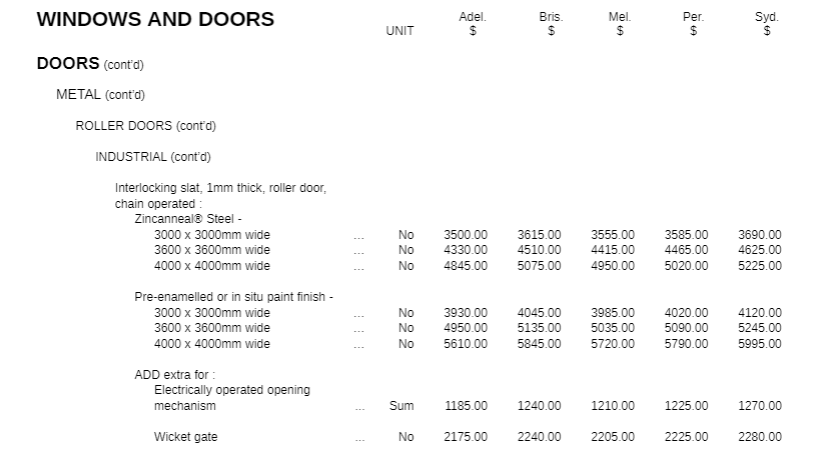

In [61]:
Image("roller_door_data.PNG")

In [54]:
area = np.array([
    [
        3000*3000,
        3600*3600,
        4000*4000,
    ],
    [
        3000*3000,
        3600*3600,
        4000*4000,
    ],
])

cost = np.array([
    [
        3690,
        4625,
        5225,
    ],
    [
        4120,
        5245,
        5995,
    ],
])

wicket_gate = 2280

electrical_mechanism = 1270

inflation = 1.03

cost = cost*inflation +electrical_mechanism + wicket_gate

## Extrapolating
The cost must be extrapolated as the area of the door is larger than that in provided by [1].

This is done by fitting a polynomial to the data. The function is then used to calculate a cost.

In [55]:
coef = np.polyfit(area[1,:], cost[1,:], 2)
extrap_func = np.poly1d(coef)

door_area = [6000*3520]
extrap_cost = extrap_func(door_area)
md(f"The extrapolated cost is ${extrap_cost[0]:.2f}")

The extrapolated cost is $10796.11

This cost is shown in the graph relative to the other data in the plot below.

In [59]:
fig = go.Figure(
    data=[
        go.Line(name='Zincanneal', y=cost[0,:], x=area[0,:]),
        go.Line(name='Pre-ennamelled', y=cost[1,:], x=area[1,:]),
        go.Line(name='Approx Door Cost', y=extrap_cost, x=door_area,),
    ],
)
# Change the bar mode
fig.update_layout(
    template="plotly_white",
    plot_bgcolor="#FFFFFF",
    title="Roller Door Cost",
    font={
        "family":"Times New Roman",
        "size":18
    }
)
fig.show()

# References
[1] Rawlinsons, Australian Construction Handbook 2019, Rawlinsons Publishing